## Import necessary Libraries

In [155]:
from bs4 import BeautifulSoup
import requests
import re
from random import randint
import numpy as np
import pandas as pd
import seaborn as sns

In [61]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [106]:
from textblob import TextBlob


## SCRAP MOVIES_INFORMATION

In [107]:
url="https://www.imdb.com/search/title/?&genres=sci_fi&explore=title_type,genres"
r = requests.get(url)
r.url

'https://www.imdb.com/search/title/?&genres=sci_fi&explore=title_type,genres'

In [108]:
r.json

<bound method Response.json of <Response [200]>>

In [109]:
content = BeautifulSoup(r.text, 'html.parser')


In [110]:
movies = []
years = []
genre = []
runtime_min = []
imdb_ratings = []
metascores = []
rating=[]
link=[]
review=[]

In [111]:
movie_containers = content.find_all('div', class_ = 'lister-item mode-advanced')

In [112]:
for container in movie_containers:

       #conditional for all with metascore
       if container.find('div', class_ = 'ratings-metascore') is not None:

           #title
           title = container.h3.a.text
           movies.append(title)

           genre.append(container.find("span", class_="genre").text.rstrip().replace("\n","").split(","))

           if container.h3.find('span', class_= 'lister-item-year text-muted unbold') is not None:
            
             #year released
             year = container.h3.find('span', class_= 'lister-item-year text-muted unbold').text.replace("(","").replace(")","").replace("I","") # remove the parentheses around the year and make it an integer
             years.append(year)

           else:
             years.append(None) # each of the additional if clauses are to handle type None data, replacing it with an empty string so the arrays are of the same length at the end of the scraping

           if container.p.find('span', class_ = 'runtime') is not None:

             #runtime
             t = int(container.p.find('span', class_ = 'runtime').text.replace(" min", "")) # remove the minute word from the runtime and make it an integer
             runtime_min.append(t)

           else:
             runtime_min.append(None)

           if float(container.strong.text) is not None:

             #IMDB ratings
             imdb = float(container.strong.text) # non-standardized variable
             imdb_ratings.append(imdb)

           else:
             imdb_ratings.append(None)

           if container.find('span', class_ = 'metascore').text is not None:

             #Metascore
             m_score = int(container.find('span', class_ = 'metascore').text) # make it an integer
             metascores.append(m_score)

           else:
             metascores.append(None)
                
           if container.p.find('span', class_ = 'certificate') is not None:
            
             #rating
             ratings = container.p.find('span', class_= 'certificate').text
             rating.append(ratings)

           else:
             rating.append("")
           
        
           #links
           if container.find('h3',class_="lister-item-header" ) is not None :
              links=container.find_all('h3',class_="lister-item-header" )
              for tag in links:
                  l='https://www.imdb.com/' + tag.find('a')['href']
                  link.append(l)   
       
          
      

In [113]:
sci_fi_df = pd.DataFrame({'movie': movies,
                      'year': years,
                       'rating': rating ,
                        'genre': genre ,  
                      'runtime_min': runtime_min,
                      'imdb': imdb_ratings,
                      'metascore': metascores,
                      'movie_link':link}
                      )

In [114]:
sci_fi_df

,movie,year,rating,genre,runtime_min,imdb,metascore,movie_link
0,Black Panther: Wakanda Forever,2022,PG-13,"[Action, Adventure, Drama]",161,7.3,67,https://www.imdb.com//title/tt9114286/
1,Black Adam,2022,PG-13,"[Action, Adventure, Fantasy]",125,6.9,41,https://www.imdb.com//title/tt6443346/
2,Black Panther,2018,PG-13,"[Action, Adventure, Sci-Fi]",134,7.3,88,https://www.imdb.com//title/tt1825683/
3,Nope,2022,R,"[Horror, Mystery, Sci-Fi]",130,6.9,77,https://www.imdb.com//title/tt10954984/
4,Everything Everywhere All at Once,2022,R,"[Action, Adventure, Comedy]",139,8.1,81,https://www.imdb.com//title/tt6710474/
5,Thor: Love and Thunder,2022,PG-13,"[Action, Adventure, Comedy]",118,6.3,57,https://www.imdb.com//title/tt10648342/
6,Strange World,2022,PG,"[Animation, Action, Adventure]",102,5.1,65,https://www.imdb.com//title/tt10298840/
7,Avatar,2009,PG-13,"[Action, Adventure, Fantasy]",162,7.8,83,https://www.imdb.com//title/tt0499549/
8,Spider-Man: No Way Home,2021,PG-13,"[Action, Adventure, Fantasy]",148,8.3,71,https://www.imdb.com//title/tt10872600/
9,Interstellar,2014,PG-13,"[Adventure, Drama, Sci-Fi]",169,8.6,74,https://www.imdb.com//title/tt0816692/


In [115]:
sci_fi_df.to_csv('IMDbRating.csv', index=False, encoding='utf-8')

In [116]:
sci_fi_df.dtypes

movie           object
year            object
rating          object
genre           object
runtime_min      int64
imdb           float64
metascore        int64
movie_link      object
dtype: object

In [117]:
sci_fi_df['year'] = pd.to_datetime(sci_fi_df['year'])

In [118]:
sci_fi_df.dtypes

movie                  object
year           datetime64[ns]
rating                 object
genre                  object
runtime_min             int64
imdb                  float64
metascore               int64
movie_link             object
dtype: object

## SCRAP REVIEWS 



In [119]:
#function to get the url to scrap review 
def get_review_link (movie_url) :
    r = requests.get(movie_url)
    r.url
    r.json
    content = BeautifulSoup(r.text, 'html.parser')
    link=[]
    review_containers = content.find_all('div', class_="ipc-title__wrapper")
    for tag in review_containers:
        l='https://www.imdb.com/' + tag.find('a')['href']
        link.append(l)
    return link[5]     

In [120]:
#function that return the reviews 
def get_reviews(review_link) :
    r = requests.get(review_link)
    r.url
    r.json
    content = BeautifulSoup(r.text, 'html.parser')
    review= [] 
    review_containers = content.find_all('div', class_="text show-more__control")
    for container in review_containers:
        r = container.text
        review.append(r)
    #df = pd.DataFrame({'review': review})
    return review

In [121]:
sci_fi_df.shape

(17, 8)

In [122]:
list=["https://www.imdb.com//title/tt9114286/reviews?...","https://www.imdb.com//title/tt6443346/reviews?...","https://www.imdb.com//title/tt1825683/reviews?...",
      "https://www.imdb.com//title/tt6710474/reviews?..." , "https://www.imdb.com//title/tt10954984/reviews..." , "https://www.imdb.com//title/tt10648342/reviews...",
      "https://www.imdb.com//title/tt0499549/reviews?...","https://www.imdb.com//title/tt5108870/reviews?...","https://www.imdb.com//title/tt0816692/reviews?...",
      "https://www.imdb.com//title/tt1483013/reviews?...","https://www.imdb.com//title/tt10872600/reviews..." ,"https://www.imdb.com//title/tt14549466/reviews..." ,
      "https://www.imdb.com//title/tt3748528/reviews?...","https://www.imdb.com//title/tt1160419/reviews?..." ,"https://www.imdb.com//title/tt8041270/reviews?...",
      "https://www.imdb.com//title/tt0434409/reviews?...", "https://www.imdb.com//title/tt8041270/reviews?..." ]



In [123]:
sci_fi_df["review_link"]=list

In [124]:
sci_fi_df

,movie,year,rating,genre,runtime_min,imdb,metascore,movie_link,review_link
0,Black Panther: Wakanda Forever,2022-01-01,PG-13,"[Action, Adventure, Drama]",161,7.3,67,https://www.imdb.com//title/tt9114286/,https://www.imdb.com//title/tt9114286/reviews?...
1,Black Adam,2022-01-01,PG-13,"[Action, Adventure, Fantasy]",125,6.9,41,https://www.imdb.com//title/tt6443346/,https://www.imdb.com//title/tt6443346/reviews?...
2,Black Panther,2018-01-01,PG-13,"[Action, Adventure, Sci-Fi]",134,7.3,88,https://www.imdb.com//title/tt1825683/,https://www.imdb.com//title/tt1825683/reviews?...
3,Nope,2022-01-01,R,"[Horror, Mystery, Sci-Fi]",130,6.9,77,https://www.imdb.com//title/tt10954984/,https://www.imdb.com//title/tt6710474/reviews?...
4,Everything Everywhere All at Once,2022-01-01,R,"[Action, Adventure, Comedy]",139,8.1,81,https://www.imdb.com//title/tt6710474/,https://www.imdb.com//title/tt10954984/reviews...
5,Thor: Love and Thunder,2022-01-01,PG-13,"[Action, Adventure, Comedy]",118,6.3,57,https://www.imdb.com//title/tt10648342/,https://www.imdb.com//title/tt10648342/reviews...
6,Strange World,2022-01-01,PG,"[Animation, Action, Adventure]",102,5.1,65,https://www.imdb.com//title/tt10298840/,https://www.imdb.com//title/tt0499549/reviews?...
7,Avatar,2009-01-01,PG-13,"[Action, Adventure, Fantasy]",162,7.8,83,https://www.imdb.com//title/tt0499549/,https://www.imdb.com//title/tt5108870/reviews?...
8,Spider-Man: No Way Home,2021-01-01,PG-13,"[Action, Adventure, Fantasy]",148,8.3,71,https://www.imdb.com//title/tt10872600/,https://www.imdb.com//title/tt0816692/reviews?...
9,Interstellar,2014-01-01,PG-13,"[Adventure, Drama, Sci-Fi]",169,8.6,74,https://www.imdb.com//title/tt0816692/,https://www.imdb.com//title/tt1483013/reviews?...


In [125]:
review=[]

In [126]:
for i in list :
    r= get_reviews(i)
    review=review+r

In [127]:
df = pd.DataFrame({'review': review})


In [128]:
df

,review
0,I am conflicted with this film and with Marvel...
1,I just got out of Black PantherI found it pret...
2,"This film had some great stuff in it, there's ..."
3,Phase 4's MCU comes to a close with Black Pant...
4,Black Panther was a very welcome addition to t...
...,...
320,"Wow, foiled again, a movie from my youth gets ..."
321,The new Jurassic World movie has got to be one...
322,4 yrs have passed since the events of Fallen K...
323,Truly a shameful film made in a hurry and with...


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  325 non-null    object
dtypes: object(1)
memory usage: 2.7+ KB


In [130]:
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
#Apply function on review column
df['review']=df['review'].apply(remove_between_square_brackets)

## Analyse des sentiments

In [131]:
def analyze_sentiment(tweet):
 analysis=TextBlob(tweet)
 if analysis.sentiment.polarity>0:
    return 'positive'
 elif analysis.sentiment.polarity==0:
    return 'neutral'
 else:
    return 'negative'

In [132]:
df=pd.DataFrame(df)
df.columns=['review']
df['sentiment']=[str(analyze_sentiment(x)) for x in df.review]
df.sentiment.value_counts()

positive    282
negative     41
neutral       2
Name: sentiment, dtype: int64

In [133]:
df

,review,sentiment
0,I am conflicted with this film and with Marvel...,positive
1,I just got out of Black PantherI found it pret...,positive
2,"This film had some great stuff in it, there's ...",positive
3,Phase 4's MCU comes to a close with Black Pant...,positive
4,Black Panther was a very welcome addition to t...,positive
...,...,...
320,"Wow, foiled again, a movie from my youth gets ...",positive
321,The new Jurassic World movie has got to be one...,negative
322,4 yrs have passed since the events of Fallen K...,positive
323,Truly a shameful film made in a hurry and with...,negative


## Some Visualisation

In [100]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [134]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


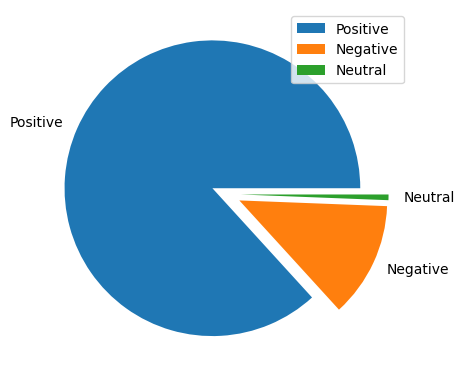

In [154]:
y = df.sentiment.value_counts()
mylabels = ["Positive","Negative","Neutral"]
myexplode=[0.1,0.1,0.1]            
plt.pie(y, labels = mylabels, explode = myexplode)
plt.legend()
plt.show()   

In [139]:
def show_cloud(input) :
    # Generate the word cloud from the input string
    cloud_test = WordCloud(background_color="white").generate(test)
    # Create a figure of the generated cloud
    plt.imshow(cloud_test, interpolation='bilinear')  
    plt.axis('off')
    # Display the figure
    plt.show()

In [140]:
test=df.iloc[0,0]

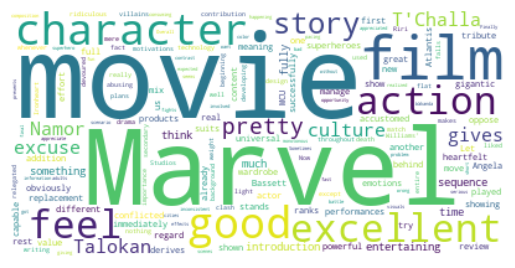

In [141]:
show_cloud(test)